In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss, confusion_matrix
from tqdm import tqdm_notebook

In [0]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0: 
      return y_pred * x
    elif y == 1:
      return -1 * (1 - y_pred) * x
    else:
      raise ValueError("y should be 0 or 1")
    
  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred 
    elif y == 1:
      return -1 * (1 - y_pred)
    else:
      raise ValueError("y should be 0 or 1")
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        if loss_fn == "mse":
          dw += self.grad_w_mse(x, y)
          db += self.grad_b_mse(x, y) 
        elif loss_fn == "ce":
          dw += self.grad_w_ce(x, y)
          db += self.grad_b_ce(x, y)
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        if loss_fn == "mse":
          loss[i] = mean_squared_error(Y, Y_pred)
        elif loss_fn == "ce":
          loss[i] = log_loss(Y, Y_pred)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      if loss_fn == "mse":
        plt.ylabel('Mean Squared Error')
      elif loss_fn == "ce":
        plt.ylabel('Log Loss')
      plt.show()
  
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [0]:
data=pd.read_csv("01Exercise1.csv")

In [6]:
type(data)

pandas.core.frame.DataFrame

In [0]:
data=data.dropna()

In [0]:
Y=data['status']
X=data.drop(['gender'],axis=1)
X=X.drop(['status'],axis=1)
X=X.drop(['married'],axis=1)

In [0]:
X_train, X_test, Y_train, Y_test=train_test_split(X ,Y , random_state=1, test_size=0.1,stratify=Y )

In [41]:
X_train

,ch,income,loanamt
189,1.0,9328,188.0
206,1.0,3244,80.0
535,1.0,2550,126.0
208,1.0,2479,59.0
119,1.0,10408,259.0
...,...,...,...
123,1.0,2957,81.0
452,0.0,3948,149.0
424,1.0,14880,96.0
476,1.0,6700,230.0


In [42]:
Y_test , Y_train

(344    Y
 61     Y
 291    N
 579    Y
 504    Y
 137    Y
 517    N
 98     Y
 558    Y
 254    N
 509    Y
 238    Y
 41     Y
 90     Y
 229    Y
 138    N
 75     N
 45     Y
 587    Y
 247    Y
 64     N
 513    N
 427    Y
 59     Y
 511    Y
 500    Y
 494    N
 390    Y
 370    Y
 532    N
 540    Y
 205    Y
 233    Y
 296    Y
 522    Y
 111    Y
 489    N
 87     Y
 256    N
 352    Y
 335    Y
 548    N
 541    N
 310    Y
 545    Y
 484    Y
 518    N
 373    N
 523    Y
 419    Y
 269    Y
 146    Y
 469    N
 Name: status, dtype: object, 189    Y
 206    Y
 535    Y
 208    Y
 119    Y
       ..
 123    Y
 452    N
 424    Y
 476    Y
 295    Y
 Name: status, Length: 476, dtype: object)

In [0]:
Y_train = (Y_train == 'Y')*1

In [0]:
Y_test = (Y_test == 'Y')*1

In [46]:
Y_test , Y_train

(344    1
 61     1
 291    0
 579    1
 504    1
 137    1
 517    0
 98     1
 558    1
 254    0
 509    1
 238    1
 41     1
 90     1
 229    1
 138    0
 75     0
 45     1
 587    1
 247    1
 64     0
 513    0
 427    1
 59     1
 511    1
 500    1
 494    0
 390    1
 370    1
 532    0
 540    1
 205    1
 233    1
 296    1
 522    1
 111    1
 489    0
 87     1
 256    0
 352    1
 335    1
 548    0
 541    0
 310    1
 545    1
 484    1
 518    0
 373    0
 523    1
 419    1
 269    1
 146    1
 469    0
 Name: status, dtype: int64, 189    1
 206    1
 535    1
 208    1
 119    1
       ..
 123    1
 452    0
 424    1
 476    1
 295    1
 Name: status, Length: 476, dtype: int64)

In [0]:
X_train=X_train.values
Y_train=Y_train.values
Y_test=Y_test.values
X_test=X_test.values

In [0]:
sc=StandardScaler()

In [0]:
X_Scaled_train=sc.fit_transform(X_train)
X_Scaled_test=sc.transform(X_test)

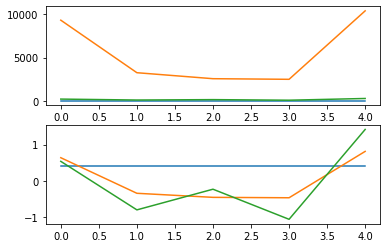

In [50]:
ax=plt.subplot(2,1,1)
ax.plot(X_train[:5],'-')
ax=plt.subplot(2,1,2)
plt.plot(X_Scaled_train[:5],'-')
plt.show()

In [0]:
sn=SigmoidNeuron()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


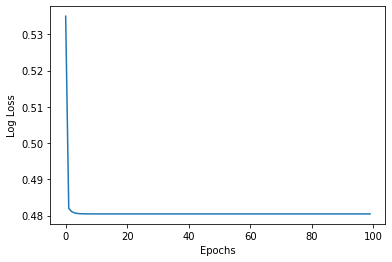

In [52]:
sn.fit(X_Scaled_train,Y_train, epochs=100, display_loss=True,loss_fn='ce',learning_rate=0.01)

In [0]:
def print_accuracy(sn):
  thres_dict={}
  max=0
  thres_dict[max]=0
  for i in tqdm_notebook(range(0,400), total=400, unit='iteration' ):
    Y_pred_train = sn.predict(X_Scaled_train)
    Y_pred_binarised_train = (Y_pred_train >= (i/400)).astype("int").ravel()
    accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
    if accuracy_train>thres_dict[max]:
      max=i/400
    thres_dict[i/400]=accuracy_train
    #print("Train Accuracy : ", accuracy_train)
    #print("-"*50)
  print("Maximum accurracy at Threshold =",max,"Accuracy =",thres_dict[max])
  plt.plot(list(thres_dict.keys()),list(thres_dict.values()))
  plt.xlabel('Threshold value')
  plt.ylabel('Accuracy')
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """



Maximum accurracy at Threshold = 0.6825 Accuracy = 0.8109243697478992


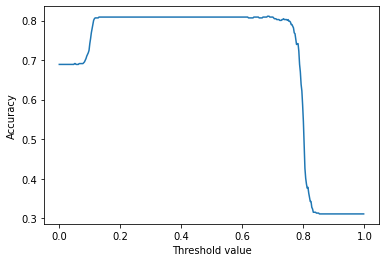

In [54]:
print_accuracy(sn)

In [0]:
Y_pred_test = sn.predict(X_Scaled_test)
#print(Y_pred_test)
Y_pred_binarised_test = (Y_pred_test >= (0.6825)).astype("int").ravel()
accuracy_test = accuracy_score(Y_pred_binarised_test, Y_test)

In [56]:
accuracy_test

0.8867924528301887